In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## OpenCV로 푸리에 변환
    OpenCV에서는 2D 이산 푸리에 변환(Discrete Fourier Transform, DFT)함수인 dft, idft 함수를 제공해준다. Numpy와 다른 점은 같은 결과를 반환하지만 두 개의 채널로 결과를 제공한다는 점에서 차이가 있다. 첫번째 채널은 결과의 실수부분을 가져가고, 두번째 채널은 결과의 허수부분을 가져간다. OpenCV로 푸리에 변환을 적용하기 위해서 입력 이미지는 처음에 np.float32로 변환되어져야 한다.
    
## cv2.dft(src [, dst [, flags [, nonzeroRows]]]) -> dst
https://docs.opencv.org/4.4.0/d2/de8/group__core__array.html#gadd6cf9baf2b8b704a11b5f04aaf4f39d

    1D, 2D 부동 소수점 배열의 푸리에 변환, 역 푸리에 변환 연산을 제공한다. (역 이산 푸리에 변환을 제공해주는 idft 함수도 제공해주지만, dft의 flags를 cv2.DFT_INVERSE로 선언해주는 것과 같은 결과가 나온다.)
    
    1. src : 실수 혹은 복소수 형태의 입력 배열
    2. dst : flags에 의해 크기와 type이 달라진다.
    
    ★★ flags : 변환기, Default = 0으로 일반적인 푸리에 변환을 수행한다.
    1. DFT_INVERSE : 역 푸리에 변환을 수행한다. (마지막에 1/MN을 곱하지 않는다.)
    2. DFT_SCALE : 변환 후 결과의 크기를 1/MN을 곱하여 조정한다. 보통 배열의 크기로 나눠주며, 일반적으로 DFT_INVERSE | DFT_SCALE 로 같이 쓰인다.
    3. DFT_ROWS : 입력받은 행렬의 매 행마다 푸리에, 역 푸리에 변환을 수행한다. 이 flag를 사용해서 여러 벡터를 동시에 변환할 수 있으며, 오버헤드를 줄여 3D 혹은 고차원 변환 등을 수행할 수 있다.
    4. DFT_COMPLEX_OUTPUT : 실수부 행렬의 푸리에 변환을 수행한다. 그 결과로 복소 켤레 대칭을 가지는 복소수 행렬(실수부, 허수부)이 나오며, 이러한 배열은 입력과 동일한 크기의 실제 배열로 압축되어질 수 있다.
    5. DFT_REAL_OUTPUT : 복소수 행렬의 역 푸리에 변환을 수행한다. 그 결과로 일반적으로 같은 크기의 복소수 행렬을 반환하지만, 만약 입력 배열이 켤레 복소수 행렬(예를들어, DFT_COMPLEX_OUTPUT flag를 이용해 나온 푸리에 변환의 결과)이라면, 그 결과로 실수 행렬을 반환한다. 함수 자체가 그 행렬이 대칭 행렬인지 아닌지 확인하지 않지만, 이 flag를 전달하여 함수가 대칭임을 가정하고 실수 배열을 출력할 수 있다.
    6. DFT_COMPLEX_INPUT : 입력이 복소수임을 명시한다. 이 flag가 설정되면, 입력되는 행렬은 반드시 2개의 채널이 있어야 한다. 반면 하위 호완성에 의해, 입력값에 2개의 채널이 있다면, 그 값은 이미 복소수 행렬이라고 간주된다.
    7. DCT_INVERSE
    8. DCT_ROWS
    (cv::DftFlags 참고)
    
    만약 입력된 배열이 실수부 행렬이고 DFT_INVERSE가 설정되지 않으면 푸리에 변환을 수행한다. 이때, DFT_COMPLEX_OUTPUT이 설정되면 출력값은 입력값과 같은 크기의 복소수 행렬이 된다.
    

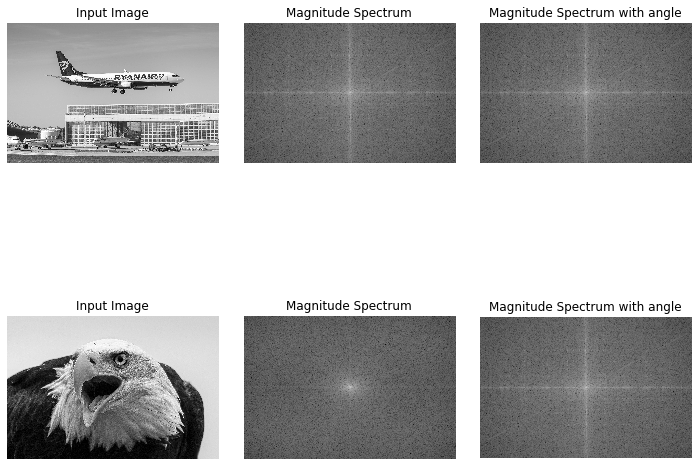

In [26]:
img = cv2.imread("ryanair-5249631_1920.jpg", cv2.IMREAD_GRAYSCALE)
# openCV의 dft 함수를 이용해 푸리에 변환. 변환된 결과는 3차원 행렬로 구성됨. 2채널로 1채널은 실수부, 2채널은 허수부를 의미
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
# 분석을 쉽게 만들기 위해 좌상단 점을 정중앙으로 이동
dft_shift = np.fft.fftshift(dft)
# 스펙트럼 계산 (복소수 값의 크기를 계산하여 log scaling)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
magnitude_spectrum_1 = 20 * np.log(cv2.cartToPolar(dft_shift[:, :, 0], dft_shift[:, :, 1]))

img2 = cv2.imread("bald-eagle-5463386_1280.jpg", cv2.IMREAD_GRAYSCALE)
dft2 = cv2.dft(np.float32(img2), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)
magnitude_spectrum2 = 20 * np.log(cv2.magnitude(dft_shift2[:, :, 0], dft_shift2[:, :, 1]))
magnitude_spectrum2_1 = 20 * np.log(cv2.cartToPolar(dft_shift[:, :, 0], dft_shift[:, :, 1]))

images = [img, magnitude_spectrum, magnitude_spectrum_1[0], img2, magnitude_spectrum2, magnitude_spectrum2_1[0]]
titles = ["Input Image", "Magnitude Spectrum", "Magnitude Spectrum with angle"]
plt.figure(figsize=(10, 10))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap = "gray")
    plt.title(titles[i % 3])
    plt.axis("off")
    
plt.tight_layout()
plt.show()

## cv2.magnitude(x,  y [, magnitude]) -> magnitude
    2D 벡터의 크기를 계산해주는 함수이다.
    
    1. x : 벡터에서 x좌표의 실수 배열을 입력받는다.
    2. y : 벡터에서 y좌표의 실수 배열을 입력받는다.
    (이때, x와 y배열의 크기는 일치해야 하며, x와 같은 크기와 같은 자료형을 가지는 배열이 출력된다.)
    
## cv2.cartToPolar(x,  y [, magnitude [, angle [, angleInDegrees]]]) -> magnitude, angle
    2D 벡터의 크기와 위상을 계산한다.
    
    1. x : 벡터에서 x좌표의 32bit 혹은 64bit의 실수 배열을 입력받는다.
    2. y : 벡터에서 y좌표의 32bit 혹은 64bit의 실수 배열을 입력받는다.
    (이때, x와 y배열의 크기는 일치해야 한다.)
    3. magnitude : x, y의 같은 크기, 같은 유형의 크기의 배열을 출력한다.
    4. angle : x, y와 같은 크기, 같은 유형의 위상의 배열을 출력한다. (이때, 각도는 radians(0~2π)이거나 degree(0~360)로 출력된다.)
    5. angleInDegrees : 위상을 radian으로 측정할지, degree로 측정할지 결정한다. default로는 false이며 이 경우에 radian으로 측정된다.
    
    cv2.magnitude와 cv2.cartToPolar로 계산한 푸리에 변환된 배열의 크기가 모두 동일한 것을 확인할 수 있다. cartToPolar로 계산했을 때, [0]의 경우에는 해당 푸리에 변환 행렬의 크기값을 얻고, [1]의 경우에는 해당 푸리에 변환 행렬의 위상 배열을 얻을 수 있다.

    Numpy 행렬에서는 저주파를 제거하여 고주파 필터링, HPF를 해봤으므로 이번에는 이미지에서 고주파를 제거해 저주파 필터링, LPF를 하는 과정을 살펴보자. 고주파 필터링때 저주파를 제거하기 위해 마스크를 씌워 0으로 만들어 줬던 것과는 반대로, 같은 마스크를 씌워 1로 만들어주면 된다.

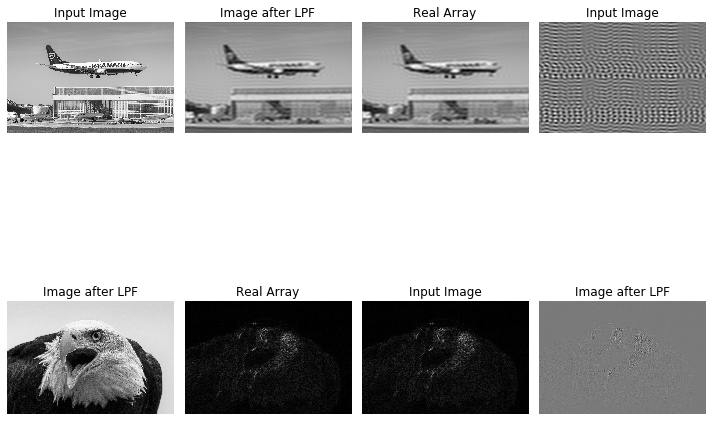

In [56]:
img = cv2.imread("ryanair-5249631_1920.jpg", cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)


rows, cols = img.shape
crow, ccol = rows//2 , cols//2
# 저주파가 있는 정중앙에 60*60 크기의 윈도우 mask를 만들어 해당 부분 1로 초기화. 나머지는 0으로 초기화.
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30 : crow+30, ccol-30 : ccol+30] = 1

# 주파수 행렬과 mask를 곱한다.
fshift = dft_shift * mask
# 나온 결과를 원래 위치로 되돌린다.
f_ishift = np.fft.ifftshift(fshift)
# 역 푸리에 변환
img_back = cv2.idft(f_ishift)
# 실수부
img_back_0 = img_back[:, :, 0]
# 허수부
img_back_1 = img_back[:, :, 1]
# 복소수 크기
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

img2 = cv2.imread("bald-eagle-5463386_1280.jpg", cv2.IMREAD_GRAYSCALE)
dft2 = cv2.dft(np.float32(img2), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)

rows2, cols2 = img2.shape
ccrow2, ccol2 = rows2//2, cols2//2
mask = np.zeros((rows2, cols2, 2), np.uint8)
mask[crow-100 : crow+100, ccol-100 : ccol+100] = 1

fshift2 = dft_shift2 * mask
f_ishift2 = np.fft.ifftshift(fshift2)
img_back2 = cv2.idft(f_ishift2)
img_back2_0 = img_back2[:, :, 0]
img_back2_1 = img_back2[:, :, 1]
img_back2 = cv2.magnitude(img_back2[:, :, 0], img_back2[:, :, 1])

images = [img, img_back, img_back_0, img_back_1, img2, img_back2, img_back2, img_back2_0, img_back2_1]
titles = ["Input Image", "Image after LPF", "Real Array", "Complex Array"]
plt.figure(figsize=(10, 10))

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap = "gray")
    plt.title(titles[i % 3])
    plt.axis("off")

plt.tight_layout()
plt.show()


    위와 같은 방식으로 이미지와 같은 크기의 numpy 행렬을 만들어 0으로 채운 뒤, 저주파가 있는 정중앙에 60 * 60의 마스크를 씌워 기존의 값을 유지하기 위해 1로 채우고 푸리에 변환된 행렬과 마스크를 곱하면 고주파는 제거되고 저주파만 필터링 된다. 따라서 윈도우가 클수록 고주파 영역이 적게 제거되기 때문에 원래 이미지와 가까워지며, 윈도우가 작을 수록 고주파 영역이 많이 제거되기 때문에 blur 효과가 많이 나타나게 된다.

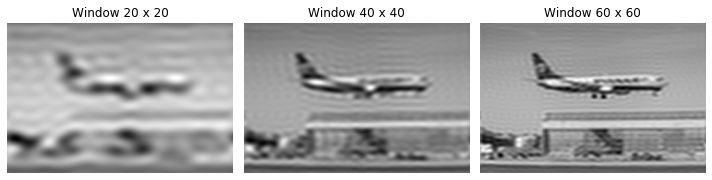

In [54]:
img = cv2.imread("ryanair-5249631_1920.jpg", cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-10 : crow+11, ccol-10 : ccol+11] = 1

fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

mask[crow-20 : crow+21, ccol-20 : ccol+21] = 1
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back2 = cv2.idft(f_ishift)
img_back2 = cv2.magnitude(img_back2[:, :, 0], img_back2[:, :, 1])

mask[crow-30 : crow+31, ccol-30 : ccol+31] = 1
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back3 = cv2.idft(f_ishift)
img_back3 = cv2.magnitude(img_back3[:, :, 0], img_back3[:, :, 1])

images = [img_back, img_back2, img_back3]
titles = ["Window 20 x 20", "Window 40 x 40", "Window 60 x 60"]
plt.figure(figsize=(10, 10))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap = "gray")
    plt.title(titles[i % 3])
    plt.axis("off")

plt.tight_layout()
plt.show()